# SNS Scraping Lab

Social media is one of the major platforms that contain vast behavioural data, such as engagement level and sentiments of people. Combining this with other relevant data, such as company-related information, can bring about amazing insights helpful for companies and researchers of various fields. 

Twitter is a social media platform that allows users to microblog - to interact with each other and spread messages through short messages. Twitter is one of the most widely used social media platforms in the world, and users are often posting unfiltered opinions that are able to be retrieved easily. 

Twitter offers many information that is available for data scientists. Twitter provides functions to:

1. GET for retrieving data
2. POST for creating data
3. PUT for updating data
4. DELETE for removing data

However, for this lab guide, we will be taking a look at mainly the GET functions as it is the main function for getting Twitter data. 

There are 4 main types of data that we can acquire: 

1. Tweets
2. Entities (e.g. hashtags, media)
3. Places
4. Users

For this lab guide, we will be taking a look at acquiring the tweets, the trending hashtags, and the users and their tweets. 

* Tweets: also known as "status updates", these are the texts that users post. 
* Entities: contains metadata and additional contextual information about the tweets (e.g. hashtags, user mentions, links, polls, and attached media such as photos and videos)
* Users: contains the account metadata that describes a particular user of Twitter (e.g. number of followers, number of tweets posted)

In order to access these Twitter data, we need to use Twitter API. This allows users to gather tweets and related metadata. To use this API, users will have to create an app in the Twitter Developers page, acquire the relevant keys for safe access, and initialise the Twitter API modules to access Twitter data. For more detailed information with illustrations, please refer to the detailed lab guide provided. 

Due to the complexity of acquiring the keys, I have already acquired one that will solely be used for this lab guide purposes only. It is important that these authorisation keys are NOT TO BE SHARED with people outside of this class. For security reasons, the authorisation key will written on the notebook provided. 

### Installing Twitter package

We have to first install the Twitter package to use the Twitter API. 

In [181]:
!pip install twitter

In [182]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import twitter
import json

## Initialising Twitter API

To use Twitter API, we have to initialise it using the tokens and the authentication keys that has been provided. 

In [183]:
# Copy and paste the keys and tokens that you have acquired
CONSUMER_KEY = 'KSl5I1Ta970LrFRo70RZJS6RC'
CONSUMER_SECRET = 'pumBJu35LoqJBXpRPc2iJq1aPWQj7lz8FbXa4MOC9xGZgOmEZn'
OAUTH_TOKEN = '900198409-n8jwPPp0PG40IuGvICBggDIBBxlQMVR4DYJChoVm'
OAUTH_TOKEN_SECRET = 'IH4llnqkvlqAOCvPijK3ByAm2iOrP5WMq5LKgwhoQXX1n'

Twitter utilises OAuth, which acts as a key that grants the users access to private resources on a website (in this case, Twitter). Twitter API integrates with OAuth to create an authentication code that allows you to access the Twitter data. 

In the code below, we input the authentication codes into the OAuth function and pass that authentication key to the Twitter API through twitter.Twitter function. This is the initialisation step for Twitter API, which creates an object that contains the authenticated API.

In [185]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

The first priority of scraping from Twitter would be to **gather the tweets**. However, we have to first determine the criteria for the tweets to be gathered. Therefore, we can either gather tweets according to the trending topics or we can gather tweets according to a particular user. 

We will first take a look at the trending topics. 

## Trending Topics

One of the main features of Twitter is that it allows users to see what are the trending topics. These trending topics can be in the form of hashtags or simple keywords that are being said by a lot of users at a given time. The easiest way to look at the trending topics is through location. 

By using Twitter API's **trends.place** function, we can gather information regarding the trending topics in a particular place that we want to look at. For this example, we will take a look at the trending topics of the entire world and the USA. 

The locations are determined through Yahoo API's "Where on Earth ID", but as of this moment, it is extremely difficult to attain the IDs as there are numerous procedures. The IDs for the entire world and the USA are shown a lot in other tutorials and websites, and that is why we were able to attain them easily. 

* Entire world ID: 1
* USA ID: 23424977

In [186]:
WORLD_WOE_ID = 1      # where-on-earth id
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

When we print out the variable "world_trends" containing the trending topics of the world, we see a messy dict in a list type of data. Unfortunately, this is the common returned data type for many Twitter API functions. If we take a closer look, we can see that for key: **trends**, we can get the **name** of the trending topic, the **url** for searching the topic, and the **tweet_volume** that indicates the number of tweets that have mentioned this particular topic. At the bottom, **as_of** shows the time when this query has been made and the **locations** that specifies the location of the query made for trending topics. 

In [188]:
len(world_trends)

1

In [187]:
print(world_trends)

[{'trends': [{'name': '#MakeAWish1stWin', 'url': 'http://twitter.com/search?q=%23MakeAWish1stWin', 'promoted_content': None, 'query': '%23MakeAWish1stWin', 'tweet_volume': 240770}, {'name': '#NCTU1stWin', 'url': 'http://twitter.com/search?q=%23NCTU1stWin', 'promoted_content': None, 'query': '%23NCTU1stWin', 'tweet_volume': 156422}, {'name': '#LekkiMassacre', 'url': 'http://twitter.com/search?q=%23LekkiMassacre', 'promoted_content': None, 'query': '%23LekkiMassacre', 'tweet_volume': 2748116}, {'name': 'jungkook', 'url': 'http://twitter.com/search?q=jungkook', 'promoted_content': None, 'query': 'jungkook', 'tweet_volume': 1282335}, {'name': '#ม็อบ21ตุลา', 'url': 'http://twitter.com/search?q=%23%E0%B8%A1%E0%B9%87%E0%B8%AD%E0%B8%9A21%E0%B8%95%E0%B8%B8%E0%B8%A5%E0%B8%B2', 'promoted_content': None, 'query': '%23%E0%B8%A1%E0%B9%87%E0%B8%AD%E0%B8%9A21%E0%B8%95%E0%B8%B8%E0%B8%A5%E0%B8%B2', 'tweet_volume': 1724509}, {'name': '#MocionDeCensura', 'url': 'http://twitter.com/search?q=%23MocionDeCens

In [190]:
print(len(world_trends))
world_trends[0].keys()

1


dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [191]:
json_normalize(world_trends[0])

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,trends,as_of,created_at,locations
0,"[{'name': '#MakeAWish1stWin', 'url': 'http://t...",2020-10-21T11:19:24Z,2020-10-19T12:34:57Z,"[{'name': 'Worldwide', 'woeid': 1}]"


In [192]:
from pandas.io.json import json_normalize
json_normalize(world_trends[0], 'trends')

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,url,promoted_content,query,tweet_volume
0,#MakeAWish1stWin,http://twitter.com/search?q=%23MakeAWish1stWin,None,%23MakeAWish1stWin,240770.0
1,#NCTU1stWin,http://twitter.com/search?q=%23NCTU1stWin,None,%23NCTU1stWin,156422.0
2,#LekkiMassacre,http://twitter.com/search?q=%23LekkiMassacre,None,%23LekkiMassacre,2748116.0
3,jungkook,http://twitter.com/search?q=jungkook,None,jungkook,1282335.0
4,#ม็อบ21ตุลา,http://twitter.com/search?q=%23%E0%B8%A1%E0%B9...,None,%23%E0%B8%A1%E0%B9%87%E0%B8%AD%E0%B8%9A21%E0%B...,1724509.0
5,#MocionDeCensura,http://twitter.com/search?q=%23MocionDeCensura,None,%23MocionDeCensura,61743.0
6,Abascal,http://twitter.com/search?q=Abascal,None,Abascal,129424.0
7,クリスマス復刻,http://twitter.com/search?q=%E3%82%AF%E3%83%AA...,None,%E3%82%AF%E3%83%AA%E3%82%B9%E3%83%9E%E3%82%B9%...,30711.0
8,サマンサ,http://twitter.com/search?q=%E3%82%B5%E3%83%9E...,None,%E3%82%B5%E3%83%9E%E3%83%B3%E3%82%B5,NaN
9,トレイ先輩,http://twitter.com/search?q=%E3%83%88%E3%83%AC...,None,%E3%83%88%E3%83%AC%E3%82%A4%E5%85%88%E8%BC%A9,13499.0


The same applies for trending topics in USA.

In [193]:
print(us_trends)

[{'trends': [{'name': 'jungkook', 'url': 'http://twitter.com/search?q=jungkook', 'promoted_content': None, 'query': 'jungkook', 'tweet_volume': 1262731}, {'name': '#MakeAWish1stWin', 'url': 'http://twitter.com/search?q=%23MakeAWish1stWin', 'promoted_content': None, 'query': '%23MakeAWish1stWin', 'tweet_volume': 239315}, {'name': '#wednesdaymorning', 'url': 'http://twitter.com/search?q=%23wednesdaymorning', 'promoted_content': None, 'query': '%23wednesdaymorning', 'tweet_volume': 23071}, {'name': '#TrumpChinaBankAccount', 'url': 'http://twitter.com/search?q=%23TrumpChinaBankAccount', 'promoted_content': None, 'query': '%23TrumpChinaBankAccount', 'tweet_volume': 11690}, {'name': '#WednesdayWisdom', 'url': 'http://twitter.com/search?q=%23WednesdayWisdom', 'promoted_content': None, 'query': '%23WednesdayWisdom', 'tweet_volume': 10836}, {'name': 'Min Yoongi', 'url': 'http://twitter.com/search?q=%22Min+Yoongi%22', 'promoted_content': None, 'query': '%22Min+Yoongi%22', 'tweet_volume': 98902},

For now, let us say that we are only interested in the trending topics. We can gather them simply through the method shown below: 

In [194]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#MakeAWish1stWin
#NCTU1stWin
#LekkiMassacre
jungkook
#ม็อบ21ตุลา
#MocionDeCensura
Abascal
クリスマス復刻
サマンサ
トレイ先輩
Min Yoongi
WE LOVE AND TRUST GOT7
Arise TV
オリオン座流星群
マーティン
Aycan Yanaç
WE LOVE YOU LIAM
引用RT
あなたの武器
#LekkiGenocide
#有吉の壁
#DePcComponentesSoyYo
#PMQs
#鬼殺隊だと思う画像を貼る
#LekkitollgateMassacre
#1KeredeAdilOlCüneyt
#EspanaPuedeConVox
#ミラクル9
#ขบวนเสด็จทําให้รถติด
#blackTuesdayNigeria
#NCT2020_1stWin
#えにし酒
#CongoIsBleeding
#TikTokStageWithBLACKPINK
#아이디와_싶다를_쳐서_본성체크
#KOUGU維新
#東大王
#21EkimDünyaGazetecilerGünü
#私の選んだ舞台少女
#KEIICHIRO
#ZenFone7ほしい
#BBIReport
#OhhAhhOutNow
#EndPoliceBrutalityinNigeraNOW
#EndHumanTraffickingInSA
#TribuPikmin
#PronounsDay
#虎バン
#あなたを殺したのはだれ
#BackToTheFutureDay


Here, we are simply iterating through the dict in list of world_trends, and printing the name of the trending topic. We can see that we were able to get only 20 trending topics through this query as Twitter only shows 20 trending topics at a time (Top 20 trending topics). 

The trending topics for USA are shown below:

In [195]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

jungkook
#MakeAWish1stWin
#wednesdaymorning
#TrumpChinaBankAccount
#WednesdayWisdom
Min Yoongi
#LekkiMassacre
WE LOVE YOU LIAM
Chris Pratt
Among Us
PARTY PARTY YEAH
Sam Elliot
HES SINGING
JK and Yoongi
Bryce Hall
Arise TV
Lagos
WE LOVE AND TRUST GOT7
Midas
I MISSED TWO LIVES
Kookie
Tory
Dense Fog Advisory
Abascal
Mookie Betts
Sanwo-Olu
Buhari
Erie
florence
#EndSARS
#WednesdayMotivation
#NCTU1stWin
#dream2cult
#LetsGetSerious
#WednesdayThoughts
#OneIsNotEnough
#LekkiGenocide
#WednesdayVibes
#waytooearly
#LekkitollgateMassacre
#MorningJoe
#LOONA_star


## Querying Tweets

We have found the trending topics in Twitter for some specific time. However, the end goal is to gather the tweets and related data. By using the trending topics as queries we can gather the tweets that include the trending topics. Let's try to get tweets that contain the hashtag: #TuesdayThoughts using **search.tweets(q=' ', count= )**. This function takes in the query term at the argument "q", and takes in the number of tweets to gather in the argument "count". 

In [196]:
searched = twitter_api.search.tweets(q='#TuesdayThoughts', count=100)

In [28]:
print(searched)

{'statuses': [{'created_at': 'Wed Oct 21 09:05:38 +0000 2020', 'id': 1318840859178172416, 'id_str': '1318840859178172416', 'text': 'RT @Eleven_Films: We have 14 days to hit our goal of 200K followers by Election Day!\n\nHelp us out and retweet if you love our content! \n#Tu…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Eleven_Films', 'name': 'Eleven Films', 'id': 2570178294, 'id_str': '2570178294', 'indices': [3, 16]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 16337690, 'id_str': '16337690', 'name': 'Anna-bear', 'screen_name': '8SparkyGrl8', 'location': 'Burke, VA', 'description': 'A beach girl stuck in the suburbs', 'url': No

The result for the query returns a dictionary containing 2 keys:

In [197]:
searched.keys()

dict_keys(['statuses', 'search_metadata'])

In [198]:
print(len(searched['statuses']), len(searched['search_metadata']))

93 9


In [199]:
statuses_0th = searched['statuses'][0]
statuses_0th

{'created_at': 'Wed Oct 21 11:24:54 +0000 2020',
 'id': 1318875907856109575,
 'id_str': '1318875907856109575',
 'text': 'RT @SatlokTv24: सतगुरु से उपदेश लेकर मर्यादा में रहकर भक्ति करने से भक्त की सभी लाभ सहज में प्राप्त होते हैं-\n-Saint Rampal Ji Maharaj\n#Tue…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SatlokTv24',
    'name': 'Satlok Tv 24 Official(💯% Follow 🔙)',
    'id': 911641754511843328,
    'id_str': '911641754511843328',
    'indices': [3, 14]}],
  'urls': []},
 'metadata': {'iso_language_code': 'hi', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1294893956409561088,
  'id_str': '1294893956409561088',
  'name': 'Vinod Das',
  'screen_name': 'VinodDa9709298

In [200]:
statuses_0th.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [201]:
print(statuses_0th['text'])
print(statuses_0th['favorite_count'])
print(statuses_0th['retweet_count'])

RT @SatlokTv24: सतगुरु से उपदेश लेकर मर्यादा में रहकर भक्ति करने से भक्त की सभी लाभ सहज में प्राप्त होते हैं-
-Saint Rampal Ji Maharaj
#Tue…
0
50


In [202]:
statuses_0th['entities']   # name and hashtag can be seen here

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'SatlokTv24',
   'name': 'Satlok Tv 24 Official(💯% Follow 🔙)',
   'id': 911641754511843328,
   'id_str': '911641754511843328',
   'indices': [3, 14]}],
 'urls': []}

The 2 keys are "statuses" and "search_metadata". Statuses contain the actual tweets collected and the corresponding metadata. Search_metadata contains the information about the query itself, which is not that useful at the moment. We will mainly focus on the "statuses" key. 

We have to be aware of the data structure when navigating through the collected tweets. 

It seems that we have gathered 100 tweets. We have set the limit to 100 tweets, and 100 tweets were available at the time. 

In the key, "statuses" refers to the actual tweets and the corresponding metadata. For example, in each status, "text" section contains the actual tweet, "id" section contains the id number for that tweet, "entities" contains the entities for the particular tweet, such as hashtags. 

Now, let's try to extract 10 tweets among the tweets that we have gathered. Along with the actual tweets, let's try to also extract the **number of favourites**, and the **number of retweets**. 

Number of favourites refers to the number of times the tweet was favourited by another use. This is a feature of Twitter that allows users to "like" the tweet. 

Retweets refers to a user relaying the tweet to their Twitter profile, allowing their followers to see the particular tweet. 

We will first store all statuses in the "statuses" variable for easier iteration.

In [203]:
statuses = searched['statuses']

In [204]:
len(statuses)

93

Then, now, we will iterate through first 10 of these tweets gathered, and print the tweet, the number of favourites, and the number of retweets. 

In [205]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favourites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @SatlokTv24: सतगुरु से उपदेश लेकर मर्यादा में रहकर भक्ति करने से भक्त की सभी लाभ सहज में प्राप्त होते हैं-
-Saint Rampal Ji Maharaj
#Tue…
Favourites:  0
Retweets:  50

RT @anuradh08156133: #TuesdayThoughts 
 अल्लाह सशरीर है दर्शनीय है ,कभी
न मरने वाले अविनाशी भगवान है
ओर अल्लाह का नाम कबीर है ।
प्रमाण सहित…
Favourites:  0
Retweets:  6

RT @MeLinNature: Brilliant things happen in calm minds 🧡🤎💛
#TuesdayThoughts #Mindfulness 
#NaturePhotography #CapeBreton 
@StormHour @ThePh…
Favourites:  0
Retweets:  89

RT @AshramGzb: #TuesdayThoughts
#सनातन_धर्म अर्थात वो धर्म जो अमिट है, जो सृष्टि की रचना से पहले भी था और उसके नष्ट होने के उपरांत भी रहेगा…
Favourites:  0
Retweets:  643

RT @pinkk9lover: In #TrumpRallyErie  @realDonaldTrump had a moment to do some branding 🤣🤪
#TheLapTopFromHell 
The crowd is on 🔥! Must be lo…
Favourites:  0
Retweets:  351

RT @Kabbalahinfo: There is great meaning in life. We can “rise above the stars,” which means that we can transcend time and space, and atta…
Fa

We can see from the above code that we can separate and extract the tweets and their corresponding metadata. So if necessary, we can store each of them as a separate variable and make them into features for later use. 

From the texts we have gathered, let's now try to extract the tweet, the user name of the one who tweeted, and the hashtags involved in the tweet.

In [206]:
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name']
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses
               for hashtag in status['entities']['hashtags']]

In [207]:
print(status_texts)

['RT @SatlokTv24: सतगुरु से उपदेश लेकर मर्यादा में रहकर भक्ति करने से भक्त की सभी लाभ सहज में प्राप्त होते हैं-\n-Saint Rampal Ji Maharaj\n#Tue…', 'RT @anuradh08156133: #TuesdayThoughts \n अल्लाह सशरीर है दर्शनीय है ,कभी\nन मरने वाले अविनाशी भगवान है\nओर अल्लाह का नाम कबीर है ।\nप्रमाण सहित…', 'RT @MeLinNature: Brilliant things happen in calm minds 🧡\U0001f90e💛\n#TuesdayThoughts #Mindfulness \n#NaturePhotography #CapeBreton \n@StormHour @ThePh…', 'RT @AshramGzb: #TuesdayThoughts\n#सनातन_धर्म अर्थात वो धर्म जो अमिट है, जो सृष्टि की रचना से पहले भी था और उसके नष्ट होने के उपरांत भी रहेगा…', 'RT @pinkk9lover: In #TrumpRallyErie  @realDonaldTrump had a moment to do some branding 🤣🤪\n#TheLapTopFromHell \nThe crowd is on 🔥! Must be lo…', 'RT @Kabbalahinfo: There is great meaning in life. We can “rise above the stars,” which means that we can transcend time and space, and atta…', 'RT @Bhupi56256617: #TuesdayMotivation\n#TuesdayThoughts\n\nAl-Khidra is Allah Kabir\nHe is in form like a Man\nAn

In [208]:
print(screen_names)

['SatlokTv24', 'anuradh08156133', 'MeLinNature', 'StormHour', 'AshramGzb', 'pinkk9lover', 'realDonaldTrump', 'Kabbalahinfo', 'Bhupi56256617', 'EssexPoliceSTN', 'STN_Airport', 'holybibletoday', 'PDXEleven', 'Eleven_Films', 'rozzleberry', 'Snishaa2', 'alos_jay', 'Emolclause', 'LasuFM', 'TeeDeeBee3', 'Adeyemolizzy', 'djflexy90', 'TheShitShowtcp', 'anuradh08156133', 'LasuFM', 'TeeDeeBee3', 'Adeyemolizzy', 'djflexy90', 'Tiffanieskater', 'fortune89659550', 'TheLakesMike', 'alos_jay', 'nikitainsan9', 'AmritIn24180907', 'HazelandRemy', 'InsanRajni786', 'judehaste_write', 'TheShitShowtcp', 'ChaliceGarden', 'NatalieAHood', 'AbdnInspired', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Dasinder1', 'Emolclause', 'SEP_US', 'ElisabethHobbes', 'mvouchercodes1', 'mvouchercodes1', 'barbiesway', 'mvouchercodes1', 'mvouchercodes1', 'judehaste_write', 'DavidOyedepoMin', 'spreadcheer1', 'SonyMusicIn', 'LittleMix', 'Singhaniya7704', 'kirkacevedo', 'B

In [209]:
print(hashtags)

['TuesdayThoughts', 'TuesdayThoughts', 'Mindfulness', 'NaturePhotography', 'CapeBreton', 'TuesdayThoughts', 'सनातन_धर्म', 'TrumpRallyErie', 'TheLapTopFromHell', 'TuesdayMotivation', 'TuesdayThoughts', 'MinecraftManhunt', 'PENTAGON1stWin', 'TuesdayThoughts', 'Daisy1stWin', 'Prayer', 'MinecraftManhunt', 'PENTAGON1stWin', 'TuesdayThoughts', 'Daisy1stWin', 'TuesdayThoughts', 'BREAKING', 'Trump', 'MidMorningShow', 'TuesdayThoughts', 'LasuFm', 'TuesdayThoughts', 'NoonVibes', 'TuesdayThoughts', 'LasuFm', 'sneckliftertuesday', 'FirmFaithInGod', 'FirmFaithInGod', 'LifeChangingTips', 'TuesdayThoughts', 'FirmFaithInGod', 'comedy', 'humor', 'CarryOn', 'London', 'MMA', 'witty', 'MentalHealth', 'TuesdayThoughts', 'Read', 'books', 'eastlondon', 'fiction', 'LaptopFromHell', 'LaptopGate', 'HunterBiden', 'TuesdayThoughts', 'BidenHarris', 'TuesdayThoughts', 'EverydayHeroes', 'TuesdayThoughts', 'TuesdayThoughts', 'TuesdayThoughts', 'TuesdayThoughts', 'TuesdayThoughts', 'TuesdayThoughts', 'TuesdayThoughts'

Through this process alone, we can now proceed with extremely important and interesting analysis such as text vectorisation. We will explore such analysis later on. 

Let's now see how many tweets we have gathered. 

In [210]:
len(status_texts)

93

As expected, we have gathered 100 tweets. 

So far, we have gathered tweets that contained the trending topics. What if we want to collect tweets that contained different key words other than the trending topics? What if we wanted to see the tweets that contained the keyword: "COVID"? 

Easy, we can do this with the same procedure as how we gathered tweets with the trending topics. 

In [211]:
searched_2 = twitter_api.search.tweets(q='COVID', count=100)

In the variable "searched_2", we have gathered recent tweets that contain the keyword, "COVID". We can do the same procedure as above, gathering the tweets and their corresponding metadata for further analysis. 

In [212]:
# storing the tweets and their info into statuses_2 variable
statuses_2 = searched_2['statuses']

In [213]:
len(statuses_2)

100

We have gathered 100 tweets as expected. 

In [214]:
status_texts_2 = [status['text'] for status in statuses_2]

screen_names_2 = [user_mention['screen_name']
               for status in statuses_2
                   for user_mention in status['entities']['user_mentions']]

hashtags_2 = [hashtag['text'] for status in statuses_2
               for hashtag in status['entities']['hashtags']]

In [216]:
len(status_texts_2), len(screen_names_2), len(hashtags_2)

(100, 89, 10)

In [217]:
# print(status_texts_2)
# print(screen_names_2)
# print(hashtags_2)

Now, we have gathered the tweets containing the terms "COVID", and we have extracted the tweets, their user names, and their hashtags. For the next section, to make the computations easier, we will focus only on the first 10 tweets gathered. 

In [218]:
status_10 = status_texts_2[:10]
len(status_10)

10

In [219]:
status_10

['RT @nylahuda: Here’s a story that matters.\n\n@LinaKlasik shares with us the challenges in building two isolation rooms in Beluran Hospital t…',
 'RT @MichaelBibi1: Fk Covid https://t.co/4CKePe3yqr',
 'just impulsively bought concert tickets 😁 covid better be gone by may or i’m throwing hands 💯💯💯',
 'RT @iElielSepulchro: Airlines And Covid-19: The Turbulence Ahead https://t.co/Yb2kzjqkQD (https://t.co/nceHuAAu7E) (#followback) (#siguemey…',
 '#Kenya: Kenya witnesses rise in COVID-19 numbers, records 602 new cases https://t.co/YM0eCfqaef',
 "RT @boostap: -che palle però sempre a parlà der covid, parlamo d'altro\n-vabbè\n-che fai a natale?\n-niente perché tanto ce rinchiudono pe er…",
 'someone in my class has covid and they said i dont even need to isolate what the fuck¿',
 'RT @dahtgirl_ajex: Nigeria govt is worst than Sars and COVID 19 ahswr \n🤦🏽\u200d♀️💔',
 'RT @CityNews: Ontario drivers have paid millions more in rising insurance premiums while driving less during the COVID-19 pan

## Text Vectorisation

Since we have now gathered the tweets according to some query that we want, we can now perform text vectorisation methods to quantify the texts. The words in the text will be encoded as integers or floating point values for use as input. By quantifying the texts, we can make them into usable features for further analysis, such as machine learning usage. 

We will take a look at 2 common methods of vectorisation: Count Vectorisation and TF-IDF Vectorisation. 

### Count Vectorisation

Count vectorising refers to a method of tokenising a collection of text documents and building a vocabulary of known words while encoding new documents using that vocabulary built. 

The method of creation is as follows: 

1. Create an instance of the CountVectorizer class
2. Call the fit() function in order to learn a vocabulary from one or more documents
3. Call the transform() function on one or more documents as needed to encode each as a vector

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

In [220]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status_10)

print(vectorizer.get_feature_names())

['19', '4ckepe3yqr', '602', 'ahead', 'ahswr', 'airlines', 'altro', 'and', 'as', 'be', 'beluran', 'better', 'boostap', 'bought', 'building', 'by', 'cases', 'ce', 'challenges', 'che', 'citynews', 'citypa', 'class', 'co', 'concert', 'covid', 'dahtgirl_ajex', 'der', 'dont', 'drivers', 'driving', 'during', 'encontra', 'er', 'even', 'fai', 'fk', 'followback', 'fuck', 'gone', 'govt', 'hands', 'has', 'have', 'here', 'hospital', 'https', 'ielielsepulchro', 'impulsively', 'in', 'insurance', 'is', 'isolate', 'isolation', 'just', 'kenya', 'less', 'liberdade', 'linaklasik', 'luislacombereal', 'matters', 'may', 'mentiras', 'michaelbibi1', 'millions', 'more', 'my', 'natale', 'ncehuaau7e', 'need', 'new', 'niente', 'nigeria', 'numbers', 'nylahuda', 'ontario', 'or', 'paid', 'palle', 'pandemic', 'para', 'parlamo', 'parlà', 'pe', 'perché', 'però', 'premiums', 'quando', 'questionar', 'records', 'responder', 'rinchiudono', 'rise', 'rising', 'rooms', 'rt', 'said', 'sars', 'sempre', 'shares', 'siguemey', 'sob

The result shows the representing words that are included in all the tweets. We can transform this into an array to make this into numerical data. The numerical data simply shows how many times a certain word has appeared in each text (tweet). 

In [ ]:
# print(x.toarray())

- 0 refers to the word not being present in the text, and 1 refers to the word being present in the text. This data can now be used as a feature to be used as an input for machine learning or other analytical purposes. 

### TF-IDF Vectorizer

Using CountVectorizer is very simple but may be too simple for usage. For example, some words like "the" might appear many times and their counts may not be meaningful in the encoded vectors. Therefore, the more popular method of calculating word frequencies is TF-IDF (Term Frequency-Inverse Document Frequency) 

* Term frequency: summarises how often a given word appears within a document
* Inverse document frequency: downscales words that appear a lot across documents

Basically, TF-IDF are word frequency scores that try to highlight words that are more interesting. 

TfidfVectorizer will tokenise documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The flow of usage is basically the same as CountVectorizer. 

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenise and build vocab
vectorizer.fit(status_10)
vector = vectorizer.transform(status_10)

We can print out the learnt vocabulary as such:

In [151]:
# print(vectorizer.vocabulary_)  # vocabularies
# print(vectorizer.idf_)         # idf values

The inverse document frequencies are printed above. We can now transform the entire document that we have prepared using TF-IDF method. 

In [223]:
print(vector.shape)

(10, 124)


In [154]:
# print(vector.toarray())

We get the TF-IDF score for each word that is normalised to values between 0 and 1. This encoded document vector can now be used directly as features for most of machine learning problems. 

## Word Cloud

We can also visualise the commonly appearing terms in the document. Using the latest 10 tweets that we have prepared, let us create a Word Cloud. 

In [224]:
# combine all strings in the list into one string
status_text = ', '.join(status_10)

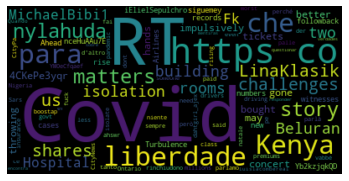

In [225]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

With bigger text document, we can get more interesting word clouds. You can explore more with bigger dataset on your own to gather more interesting insights. 

## Accessing User Information

So far, we have learnt how to find out the trending topics, how to use query terms to gather tweets, and how to use those tweets gathered to gain insights. There is another method of gathering tweets and useful information: accessing user information. 

By accessing user information, we can gain useful information such as:
   
1. Location
2. Follower count
3. Date of creation
4. Number of tweets

And many more. 

### Getting User Information

Using **users.lookup(screen_name= )**, we can access a user's information. In the argument "screen_name", we have to input the Twitter ID name that we want to access. The Twitter ID name is the name in the form of "@SocialWebMining", where the @ signifies that it is an ID. The output is a nested dictionary in a list, requiring careful navigation. 

As an example, let us try to access Elon Musk's Twitter account. Elon Musk's Twitter ID is @elonmusk. 

In [226]:
account = twitter_api.users.lookup(screen_name='elonmusk')

In [227]:
print(account)

[{'id': 44196397, 'id_str': '44196397', 'name': 'Elon Musk', 'screen_name': 'elonmusk', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 39464598, 'friends_count': 97, 'listed_count': 56511, 'created_at': 'Tue Jun 02 20:12:29 +0000 2009', 'favourites_count': 6915, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 12645, 'lang': None, 'status': {'created_at': 'Wed Oct 21 02:55:44 +0000 2020', 'id': 1318747771608903680, 'id_str': '1318747771608903680', 'text': '@Erdayastronaut After it gets to orbit a few times', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Erdayastronaut', 'name': 'Everyday Astronaut', 'id': 3167257102, 'id_str': '3167257102', 'indices': [0, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 13187464304

We can now extract necessary information into variables of our choice. For example, let us extract the **name**, **description**, and **followers_count**. 

In [228]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [229]:
account_name = account[0]['name']

account_description = account[0]['description']

account_followers = account[0]['followers_count']

In [231]:
print(account_name)
print(account_description)
print(account_followers)

Elon Musk

39464598


Unfortunately for Elon Musk, there is no description available. However, using these methods, we can now create more features should we need these information. 

### Getting User's Tweets

Getting a user's information is good, but it would be much better to get the tweets of a user. Fortunately, the Twitter API provides such function: **statuses.user_timeline(screen_name= , count= )**

In [232]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='elonmusk', count=100)

In [233]:
print(user_tweets)

[{'created_at': 'Wed Oct 21 02:55:44 +0000 2020', 'id': 1318747771608903680, 'id_str': '1318747771608903680', 'text': '@Erdayastronaut After it gets to orbit a few times', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Erdayastronaut', 'name': 'Everyday Astronaut', 'id': 3167257102, 'id_str': '3167257102', 'indices': [0, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1318746430459252740, 'in_reply_to_status_id_str': '1318746430459252740', 'in_reply_to_user_id': 3167257102, 'in_reply_to_user_id_str': '3167257102', 'in_reply_to_screen_name': 'Erdayastronaut', 'user': {'id': 44196397, 'id_str': '44196397', 'name': 'Elon Musk', 'screen_name': 'elonmusk', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 39464626, 'friends_count': 97, 'listed_count': 56512, 'created_at

In [234]:
len(user_tweets)

100

We have gathered latest 100 tweets of Elon Musk. In a list, there are 100 dictionaries, each dictionary containing the tweet and its corresponding information. We can do similar methods to extract the necessary information. We will now try to extract 10 tweets of Elon Musk. 

We will first try to navigate through the data structure and print out the latest 10 tweets. 

In [235]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


@Erdayastronaut After it gets to orbit a few times

@Erdayastronaut Got a little melty tbh :)

@Erdayastronaut Those engines could go 300 bar, but would be dicey. Pushing it for near-term tests doesn’t achieve… https://t.co/pULPf49me1

@Erdayastronaut Raptor has now run for 90 secs at 300 bar chamber pressure before encountering issues. 210 mT-F sea… https://t.co/Rg2eRWhZnT

FSD beta rollout happening tonight. Will be extremely slow &amp; cautious, as it should.

Data from 3 engine Starship static fire this morning looks good. Proceeding with nosecone mate.

@PPathole @toadmeister Yes. We also have to consider population life-months lost from lockdowns &amp; other restriction… https://t.co/0Ct2sVAngy

@toadmeister Sweden at zero deaths Oct 15 https://t.co/Gy9a20uMmX

@JoshTownsend_96 Yes

@juanjacobs @jwangARK Firmware is probably a slightly more accurate description, but yes


Now, we will save all of Elon Musk's tweets into a variable since we know now how to navigate through the data structure. 

In [236]:
user_texts = [status['text'] for status in user_tweets]

In [237]:
len(user_texts)

100

We will use only 10 tweets, same as before, for computational ease. 

In [239]:
user_10 = user_texts[:10]
len(user_10)

10

In [240]:
# user_10

### Vectoriser with User Tweets

Same as before, we can try vectorising Elon Musk's tweets using Count Vectoriser, TF-IDF Vectoriser, and visualising through Word Cloud. 

#### Count Vectoriser

In [241]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_10)
print(vectorizer.get_feature_names())

['0ct2svangy', '15', '210', '300', '90', 'accurate', 'achieve', 'after', 'also', 'amp', 'as', 'at', 'bar', 'be', 'before', 'beta', 'but', 'cautious', 'chamber', 'co', 'consider', 'could', 'data', 'deaths', 'description', 'dicey', 'doesn', 'encountering', 'engine', 'engines', 'erdayastronaut', 'extremely', 'few', 'fire', 'firmware', 'for', 'from', 'fsd', 'gets', 'go', 'good', 'got', 'gy9a20ummx', 'happening', 'has', 'have', 'https', 'is', 'issues', 'it', 'joshtownsend_96', 'juanjacobs', 'jwangark', 'life', 'little', 'lockdowns', 'looks', 'lost', 'mate', 'melty', 'months', 'more', 'morning', 'mt', 'near', 'nosecone', 'now', 'oct', 'orbit', 'other', 'population', 'ppathole', 'pressure', 'probably', 'proceeding', 'pulpf49me1', 'pushing', 'raptor', 'restriction', 'rg2erwhznt', 'rollout', 'run', 'sea', 'secs', 'should', 'slightly', 'slow', 'starship', 'static', 'sweden', 'tbh', 'term', 'tests', 'this', 'those', 'times', 'to', 'toadmeister', 'tonight', 'we', 'will', 'with', 'would', 'yes', 'z

In [242]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


#### TF-IDF Vectoriser

In [243]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_10)

print(vectorizer.vocabulary_)

{'erdayastronaut': 30, 'after': 7, 'it': 49, 'gets': 38, 'to': 96, 'orbit': 68, 'few': 32, 'times': 95, 'got': 41, 'little': 54, 'melty': 59, 'tbh': 90, 'those': 94, 'engines': 29, 'could': 21, 'go': 39, '300': 3, 'bar': 12, 'but': 16, 'would': 102, 'be': 13, 'dicey': 25, 'pushing': 76, 'for': 35, 'near': 64, 'term': 91, 'tests': 92, 'doesn': 26, 'achieve': 6, 'https': 46, 'co': 19, 'pulpf49me1': 75, 'raptor': 77, 'has': 44, 'now': 66, 'run': 81, '90': 4, 'secs': 83, 'at': 11, 'chamber': 18, 'pressure': 72, 'before': 14, 'encountering': 27, 'issues': 48, '210': 2, 'mt': 63, 'sea': 82, 'rg2erwhznt': 79, 'fsd': 37, 'beta': 15, 'rollout': 80, 'happening': 43, 'tonight': 98, 'will': 100, 'extremely': 31, 'slow': 86, 'amp': 9, 'cautious': 17, 'as': 10, 'should': 84, 'data': 22, 'from': 36, 'engine': 28, 'starship': 87, 'static': 88, 'fire': 33, 'this': 93, 'morning': 62, 'looks': 56, 'good': 40, 'proceeding': 74, 'with': 101, 'nosecone': 65, 'mate': 58, 'ppathole': 71, 'toadmeister': 97, 'y

In [176]:
vector = vectorizer.transform([user_10[0]])

In [177]:
print(vector.shape)

(1, 105)


#### Word Cloud

In [179]:
user_combined = ', '.join(user_10)

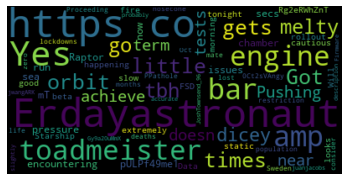

In [244]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion

Therefore, now we have taken a look at some simplistic methods in exploring Twitter and gathering tweets. There are many more complex and advanced methods that can be used that requires more programming and API understanding and expertise. 

# Homework Exercise
- Gather Twitter data regarding a topic of your own interest and perform the same exploration as the guide.
- Gather tweets of 5 Twitter users and perform the same exploration as the guide.